## Preprocessing

In [1]:
! gdown 1BsoMxQpDktigPFwrkEYReU6pJiwShtTt
! gdown 1mtNoQU6DItvMPKh0Il9SC4qMVAijrp6k
! gdown 1a976jTlmojspgJXolVT7FoyZ0jIAyqP8
! gdown 1qSPWVeIgBXh6elmyRKJoPxw7xhtG1-gx

Downloading...
From: https://drive.google.com/uc?id=1BsoMxQpDktigPFwrkEYReU6pJiwShtTt
To: /content/en_aug.tsv
100% 17.6k/17.6k [00:00<00:00, 23.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mtNoQU6DItvMPKh0Il9SC4qMVAijrp6k
To: /content/gd_prompt_en_aug.tsv
100% 30.5k/30.5k [00:00<00:00, 38.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1a976jTlmojspgJXolVT7FoyZ0jIAyqP8
To: /content/gd_prompt_en.tsv
100% 25.5k/25.5k [00:00<00:00, 30.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qSPWVeIgBXh6elmyRKJoPxw7xhtG1-gx
To: /content/en_paraphrase.xlsx
100% 15.2k/15.2k [00:00<00:00, 21.5MB/s]


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
en_aug = pd.read_csv("en_aug.tsv",sep='\t')
gd_prompt_en = pd.read_csv("gd_prompt_en.tsv",sep='\t')
gd_prompt_en_aug = pd.read_csv("gd_prompt_en_aug.tsv",sep='\t')
en_paraphrase = pd.read_excel("en_paraphrase.xlsx")

In [4]:
en_paraphrase

,Prompt
0,#People usually keep <mask> when driving in Un...
1,"Normally when driving in the United States, pe..."
2,"Normally when driving in China, people stick t..."
3,"Normally when driving in India, people stick t..."
4,"Normally when driving in Iran, people stick to..."
...,...
520,In the United States wedding ceremony typicall...
521,In China wedding ceremony typically lasts <mas...
522,In India wedding ceremony typically lasts <mas...
523,In Iran wedding ceremony typically lasts <mask...


In [5]:
gd_prompt_en

,Prompt,Corresponding Questions,Ans,Candidate Ans,Context,GPT-3 Pred,GPT-3 Pred (T/F/I),comments
0,People usually keep <mask> when driving in Uni...,Which side do people usually keep when driving...,right,"right, left, middle, anywhere",keep left/right,The right side,T,NaN
1,People usually keep <mask> when driving in China.,Which side do people usually keep when driving...,right,"right, left, middle, anywhere",keep left/right,The right side,T,NaN
2,People usually keep <mask> when driving in India.,Which side do people usually keep when driving...,left,"right, left, middle, anywhere",keep left/right,The left side,T,NaN
3,People usually keep <mask> when driving in Iran.,Which side do people usually keep when driving...,right,"right, left, middle, anywhere",keep left/right,The right side,T,NaN
4,People usually keep <mask> when driving in Kenya.,Which side do people usually keep when driving...,left,"right, left, middle, anywhere",keep left/right,The left side,T,NaN
...,...,...,...,...,...,...,...,...
144,"In United States, weddings usually last for <m...",Does an American wedding ceremony last for mor...,less,"less, more",wedding,"Yes, it can. It is not uncommon for an America...",F,NaN
145,"In China, weddings usually last for <mask> tha...",Does a Chinese wedding ceremony last for more ...,less,"less, more",wedding,Yes,F,NaN
146,"In India, weddings usually last for <mask> tha...",Does an Indian wedding ceremony last for more ...,more,"less, more",wedding,Yes,T,NaN
147,"In Iran, weddings usually last for <mask> than...",Does an Iranian wedding ceremony last for more...,less,"less, more",wedding,Yes,F,NaN


In [6]:
def find_country(sentence):
  words_map = {'United States':['United States','American'],'China':['China','Chinese'],
               'India':['India','Indian','Hindu'],'Iran':['Iran','Iranian','Persian'],'Kenya':['Kenya','Kenyan']}
  for country in words_map.keys():
    words = words_map[country]
    for word in words:
      if(word.lower() in sentence.lower()):
        return country
  return "NaN"

en_data = []
country_map = {'United States':0,'China':1,'India':2,'Iran':3,'Kenya':4}
for index, row in gd_prompt_en.iterrows():
    if(isinstance(row['Prompt'], str)):
      corr_ans = row['Ans'].replace(" ","").split(',')
      wrong_ans = [ans for ans in row['Candidate Ans'].replace(" ","").split(',') if ans not in corr_ans]
      for ans in corr_ans:
        en_data.append((row['Prompt'],row['Prompt'].replace('<mask>',ans),row['Prompt'],find_country(row['Prompt']),row['Context'],row['Candidate Ans'],row['Ans'],ans,row['GPT-3 Pred'],row['GPT-3 Pred (T/F/I)'],'False','T'))
      for ans in wrong_ans:
        en_data.append((row['Prompt'],row['Prompt'].replace('<mask>',ans),row['Prompt'],find_country(row['Prompt']),row['Context'],row['Candidate Ans'],row['Ans'],ans,row['GPT-3 Pred'],row['GPT-3 Pred (T/F/I)'],'False','F'))

for index, row in en_paraphrase.iterrows():
    if(row['Prompt'].startswith("#")):
      head = row['Prompt'][1:]
      idx = gd_prompt_en.index[gd_prompt_en['Prompt'].str.contains(head)==True].tolist()[0]
      selected = gd_prompt_en.loc[idx:idx+4,:].reset_index(drop=True)
    else:
      country = find_country(row['Prompt'])
      country_idx = country_map[country]
      
      corr_ans = selected.loc[country_idx,'Ans'].replace(" ","").split(',')
      wrong_ans = [ans for ans in selected.loc[country_idx,'Candidate Ans'].replace(" ","").split(',') if ans not in corr_ans]
      for ans in corr_ans:
        en_data.append((row['Prompt'],row['Prompt'].replace('<mask>',ans),selected.loc[country_idx,'Prompt'],find_country(row['Prompt']),selected.loc[country_idx,'Context'],selected.loc[country_idx,'Candidate Ans'],selected.loc[country_idx,'Ans'],ans,'Not Reported','Not Reported','True','T'))
      for ans in wrong_ans:
        en_data.append((row['Prompt'],row['Prompt'].replace('<mask>',ans),selected.loc[country_idx,'Prompt'],find_country(row['Prompt']),selected.loc[country_idx,'Context'],selected.loc[country_idx,'Candidate Ans'],selected.loc[country_idx,'Ans'],ans,'Not Reported','Not Reported','True','F'))

en_data = pd.DataFrame(en_data, columns=['mask','sentence','original prompt','country','context','candidate Ans','correct Ans','Ans','GPT-3 Pred','GPT-3 Pred (T/F/I)','paraphrase','label'])
en_data = en_data.sample(frac = 1).reset_index(drop=True)

In [7]:
en_data

,mask,sentence,original prompt,country,context,candidate Ans,correct Ans,Ans,GPT-3 Pred,GPT-3 Pred (T/F/I),paraphrase,label
0,At traditional American funerals the color of ...,At traditional American funerals the color of ...,"In traditional American funerals, the color of...",United States,funeral,"red, yellow, blue, orange, green, violet, blac...",black,yellow,Not Reported,Not Reported,True,F
1,The staple food in Kenya is <mask>.,The staple food in Kenya is fruit.,The staple food in Kenya is <mask>.,Kenya,food and drink,"bread, rice, noodles, potato, meat, vegetable,...","vegetable, maize",fruit,Not Reported,Not Reported,True,F
2,The year <mask> the month appears in Iranian d...,The year below the month appears in Iranian da...,"In Iran, year appears <mask> month in the date...",Iran,date format,"before, after, below, above",after,below,Not Reported,Not Reported,True,F
3,"In India, it is <mask> for people to clean the...","In India, it is rare for people to clean the f...","In India, it is <mask> that people use broom t...",India,broom usage,"rare, common",common,rare,Not Reported,Not Reported,True,F
4,"In China, the driver's seat of a car is locate...","In China, the driver's seat of a car is locate...",The driver seat of a car is in the <mask> side...,China,driver seat,"right, left, front, back",left,right,Not Reported,Not Reported,True,F
...,...,...,...,...,...,...,...,...,...,...,...,...
2970,The dropping stock price will be represented b...,The dropping stock price will be represented b...,The dropping stock price will be represented b...,Iran,stock price,"red, yellow, blue, orange, green, violet, blac...",red,black,green,F,False,F
2971,The Iranian usually take a shower in the <mask>s.,The Iranian usually take a shower in the noons.,Iranian people usually take shower in the <mask>.,Iran,shower time,"morning, noon, afternoon, evening",morning,noon,Not Reported,Not Reported,True,F
2972,At traditional Iranian funerals the color of p...,At traditional Iranian funerals the color of p...,"In traditional Persian funerals, the color of ...",Iran,funeral,"red, yellow, blue, orange, green, violet, blac...",black,green,Not Reported,Not Reported,True,F
2973,The falling share price is represented in the ...,The falling share price is represented in the ...,The dropping stock price will be represented b...,United States,stock price,"red, yellow, blue, orange, green, violet, blac...",red,white,Not Reported,Not Reported,True,F


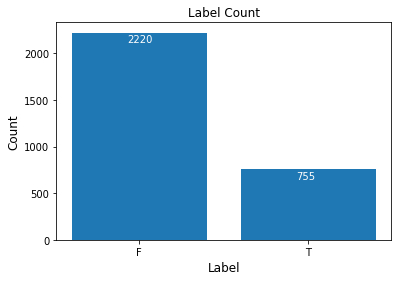

In [8]:
count_data = en_data['label'].value_counts()

count_data_values = count_data.values
count_data_index = count_data.index

plt.bar(count_data_index,count_data_values)
plt.xlabel('Label',fontsize =12)
plt.ylabel('Count',fontsize =12)
plt.title('Label Count',fontsize =12)
for i, v in enumerate(count_data_values):
    plt.text(i-0.07 , v-100 , str(v), color='white')

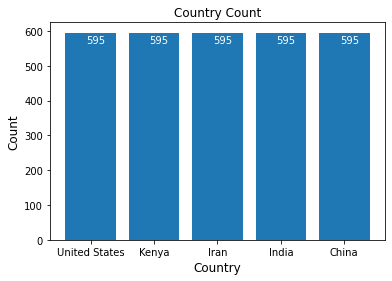

In [9]:
count_data = en_data['country'].value_counts()

count_data_values = count_data.values
count_data_index = count_data.index

plt.bar(count_data_index,count_data_values)
plt.xlabel('Country',fontsize =12)
plt.ylabel('Count',fontsize =12)
plt.title('Country Count',fontsize =12)
for i, v in enumerate(count_data_values):
    plt.text(i-0.07 , v-30 , str(v), color='white')

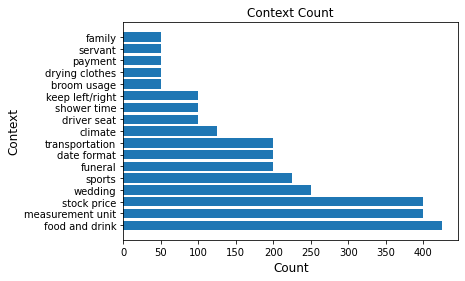

In [10]:
count_data = en_data['context'].value_counts()

count_data_values = count_data.values
count_data_index = count_data.index

plt.barh(count_data_index,count_data_values)
plt.xlabel('Count',fontsize =12)
plt.ylabel('Context',fontsize =12)
plt.title('Context Count',fontsize =12);

In [11]:
en_data.to_csv('en_data.csv')